# 영상의 화소처리  (Point processing)

In [1]:
import sys
import numpy as np
import cv2


# 그레이스케일 영상 불러오기
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.add(src, 100)
#dst = np.clip(src + 100., 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

# 컬러 영상 불러오기
src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.add(src, (100, 100, 100, 0))
#dst = np.clip(src + 100., 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


## 산술연산


In [ ]:
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt


src1 = cv2.imread('lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()


## 컬러 영상

In [ ]:
## cv2.split(m, mv=None) -> dst
# m: 다채널 컬러영상
# mv: 츨력영상
# dst: 출력영상의 리스트

## cv2.merge(mv, mv=None) -> dst
# mv: 입력영상의 리스트

# RGB to Grayscale
# Y = 0.299R + 0.587G + 0.114B 

In [11]:
import sys
import numpy as np
import cv2


# 컬러 영상 불러오기
src = cv2.imread('candies.png', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

# 컬러 영상 속성 확인
print('src.shape:', src.shape)  # src.shape: (480, 640, 3)
print('src.dtype:', src.dtype)  # src.dtype: uint8

# HSV 색 평변분할
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
b_plane, g_plane, r_plane = cv2.split(src_hsv)

# RGB 색 평면 분할
# b_plane, g_plane, r_plane = cv2.split(src)

#b_plane = src[:, :, 0]
#g_plane = src[:, :, 1]
#r_plane = src[:, :, 2]

cv2.imshow('src', src)
cv2.imshow('B_plane', b_plane)
cv2.imshow('G_plane', g_plane)
cv2.imshow('R_plane', r_plane)
cv2.waitKey()

cv2.destroyAllWindows()


src.shape: (480, 640, 3)
src.dtype: uint8


## 영상 히스토그램 분석

In [ ]:
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
# images: 입력영상 리스트(리스트로 입력)
# channels: 채널리스트, 3 채널의 경우 [0,1,2]
# mask: 마스크 영상입력, 영상전체는 None으로 지정
# histSize: 히스터그램 빈의 크기
# range: 히스토그램의 최솟값과 최댓값
# hist: 계산된 히스토그램, numpy.ndarray 타입
# accumulate: 기존의 히스토그램을 누적할경우 True

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]
[array([[125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       ...,
       [ 60,  60,  58, ...,  84,  76,  79],
       [ 57,  57,  62, ...,  79,  81,  81],
       [ 57,  57,  62, ...,  79,  81,  81]], dtype=uint8), array([[137, 137, 137, ..., 148, 130,  99],
       [137, 137, 137, ..., 148, 1

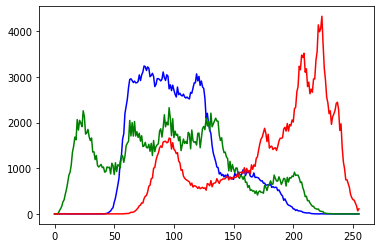

In [42]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2


# 그레이스케일 영상의 히스토그램
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 
hist = cv2.calcHist([src], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.waitKey()

plt.plot(hist)
plt.show()

# 컬러 영상의 히스토그램
src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)
print(src)
print(bgr_planes)


for (p, c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)

cv2.imshow('src', src)
cv2.waitKey()

plt.show()

cv2.destroyAllWindows()


## 영상의 명암비 조절 (Histgram stretching)

In [ ]:
# cv2.normalize(src, dst=None, alpha=None, beta=None, norm_type=None, dtype=None, mask=None) -> dst
# src: 입력영상
# dst: 결과영상
# alpha: 정규화 최소값 (예, 0)
# beta: 정규화 최댓값 (예, 155)
# norm_type: cv2.NORM_MINMAX
# dtype =  -1, src와 같은 type

In [2]:
import sys
import numpy as np
import cv2


src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
gmin, gmax, _, _ = cv2.minMaxLoc(src)
# dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
dst = np.clip((src - gmin) * 255. / (gmax - gmin) + 0, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


## 히스토그램 평활화

In [ ]:
# equalizeHist(src, dst=None) -> dst
# src: 입력영상,gray scale 영상만 가능

In [4]:
import sys
import numpy as np
import cv2


# 그레이스케일 영상의 히스토그램 평활화
src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

# 컬러 영상의 히스토그램 평활화
src = cv2.imread('field.bmp')


if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
ycrcb_planes = cv2.split(src_ycrcb)
ycrcb_planes[0] = cv2.equalizeHist(ycrcb_planes[0])

dst_ycrcb = cv2.merge(ycrcb_planes)
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


## 특정 색상 영역 찾아 내기

In [ ]:
# inRange(src, lowerb, upperb[, dst]) -> dst
# src: 입력영상
# lowerb: 하한값
# upperb: 상한값

In [5]:
import sys
import numpy as np
import cv2


src = cv2.imread('candies.png')
#src = cv2.imread('candies2.png')

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100)) # b, g, r
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255)) # h, s, v

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()

cv2.destroyAllWindows()

## 히스토그램 역투영

In [7]:
import sys
import numpy as np
import cv2


# 입력 영상에서 ROI를 지정하고, 히스토그램 계산

src = cv2.imread('cropland.png')

if src is None:
    print('Image load failed!')
    sys.exit()

x, y, w, h = cv2.selectROI(src)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
crop = src_ycrcb[y:y+h, x:x+w]

# 0 번은 조명/밝기 정보, [1,2] = Cr, Cb channel
channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]

# [0, 256, 0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([crop], channels, None, histSize, ranges)
hist_norm = cv2.normalize(cv2.log(hist+1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 입력 영상 전체에 대해 히스토그램 역투영

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
dst = cv2.copyTo(src, backproj)

cv2.imshow('backproj', backproj)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()
